In [1]:
from QPIXL_qiskit.helper import *
from QPIXL_qiskit.qpixl_parallel import *
from qiskit.visualization import *
from qiskit_aer import StatevectorSimulator
import qiskit 
backend = StatevectorSimulator(method="statevector")

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('figures/creation_world.png')
img = img.convert('L')
img = np.array(img.resize((32,32), Image.Resampling.LANCZOS)) # Compress for faster processing
img2 = Image.open('figures/cat.webp')
img2 = img2.convert('L')
img2 = np.array(img2.resize((32,32), Image.Resampling.LANCZOS))
print(img2.shape,img.shape)

(32, 32) (32, 32)


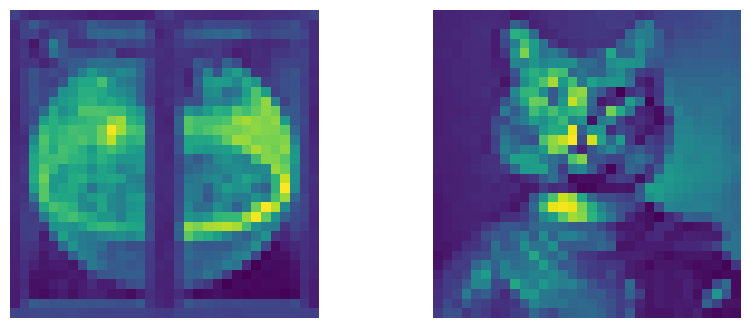

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.axis('off')
ax2.axis('off')
ax1.imshow(img)
ax2.imshow(img2)
plt.show()

In [6]:
shape = img.shape
# Just rotate the images to get additional data
np_frame = [np.array(img).T.flatten(),np.array(img2).T.flatten(),np.flip(np.array(img2).T.flatten()),np.flip(np.array(img2)).flatten(),np.flip(np.array(img2)).T.flatten()] #sometimes you have to transpose the image for the decoding to make sense
decoded_data = []
labels = []
comp_str = "Compression: "+str(0)+"% \n"
qc = cFRQI(np_frame,0)
job = backend.run(qc)
depth_str = " Circuit depth: "+str(qc.depth())
#### Just for show
sv = np.real(job.result().get_statevector())
decoded = decodeParallelQPIXL(sv,qc,len(np_frame))
for datum in decoded:
    decoded_data.append(reconstruct_img(datum, shape))
labels.append(comp_str+depth_str)


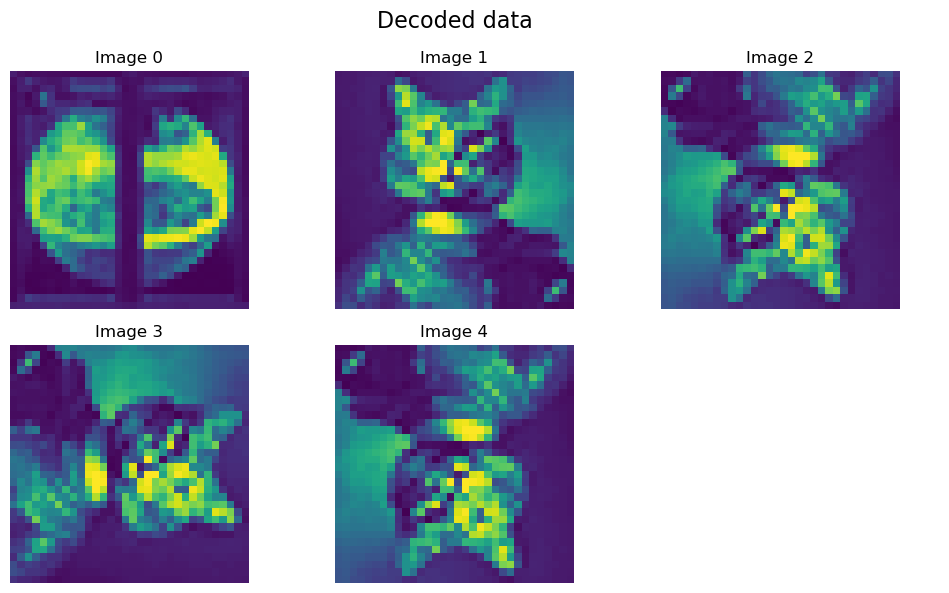

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plot the first three images in the top row
for i, ax in enumerate(axs.flat):
    if i < 3:
        ax.imshow(decoded_data[i])
        ax.set_title(f"Image {i}")
        ax.axis("off")  # Hide axes

# Cancel the last plot (remove the empty subplot)
axs[1, 2].axis("off")

# Create a new grid for the bottom two images
bottom_grid = axs[1, :2]

# Plot the remaining two images centered underneath the top row
for i, ax in enumerate(bottom_grid):
    ax.imshow(decoded_data[i + 3])
    ax.set_title(f"Image {i + 3}")
    ax.axis("off")  # Hide axes

# Add a title to the entire figure
plt.suptitle("Decoded data", fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
def permute_bits(b,bitlength=8,shift=1): ## How you permute the bits after decoding
    b = bin(b)
    b = b[2:].zfill(bitlength)
    b = [b[(i + shift) % len(b)] for i in range(len(b))]
    return int(''.join(b),2)